<a href="https://colab.research.google.com/github/Shraddha6999/CARDIOVASCULAR-RISK-PREDICTION-/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type -**     Classification
##### **Contribution -**     Individual
##### **Team Member 1 -**    Shraddha Chandurkar 

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Shraddha6999/CARDIOVASCULAR-RISK-PREDICTION-

# **Problem Statement**


Cardiovascular disease is a major cause of morbidity and mortality worldwide. Early identification and management of individuals at high risk of developing cardiovascular disease is crucial for the prevention of the disease. Traditional risk prediction models, such as the Framingham Risk Score, have limitations in their accuracy and do not account for the complex interactions between various risk factors. Machine learning techniques have shown promising results in improving the accuracy of cardiovascular risk prediction by integrating various risk factors and identifying non-linear interactions. However, there is a need for developing and validating machine learning models that can accurately predict cardiovascular risk using demographic, clinical, and laboratory data. The goal of this project is to address this need by developing and evaluating a machine learning model for predicting the 10-year risk of cardiovascular disease using the Framingham Heart Study dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries

## Data Maipulation Libraries
import numpy as np
import pandas as pd

## Data Visualisation Libraray
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

## Machine Learning 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Importing essential libraries to check the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

## Warnings 
import warnings 
warnings.filterwarnings('ignore')

### Dataset Loading

In [5]:
# import drive
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module_4_ML/Project/Classification/data_cardiovascular_risk.csv')

Mounted at /content/drive


### Dataset First View

In [6]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
print("Dataset Size")
print("Rows = {} and  Columns = {}".format(df.shape[0], df.shape[1]))

Dataset Size
Rows = 3390 and  Columns = 17


### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
print(df.isnull().sum())

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


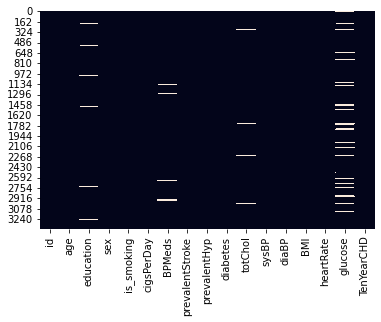

In [12]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar = False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description 

**Demographic:**

1) Age: Age of the patient.

2) Sex: male or female("M" or "F")

**Behavioral:**

3) is_smoking: whether or not the patient is a current smoker ("YES" or "NO").

4) CigsPerDay: the number of cigarettes that the person smoked on average in one day.(countinous type feature because a person can smoke 'n' times a day)

**Medical(history):**

5) BPMeds: whether or not the patient was on blood pressure medication.

6) Prevalent Stroke: whether or not the patient had previously had a stroke.

7) Prevalent Hyp: whether or not the patient was hypertensive.

8) Diabetes: whether or not the patient had diabetes.

**Medical(current):**

9) Tot Chol: total cholesterol level.

10) Sys BP: systolic blood pressure.

11) Dia BP: diastolic blood pressure.

12) BMI: Body Mass Index.

13) Heart Rate: heart rate.

14) Glucose: glucose level.

**Target feature(class of risk):**

15) TenYearCHD: 10-year risk of coronary heart disease CHD (“1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ", i , "is" , df[i].nunique(), ".")

No. of unique values in  id is 3390 .
No. of unique values in  age is 39 .
No. of unique values in  education is 4 .
No. of unique values in  sex is 2 .
No. of unique values in  is_smoking is 2 .
No. of unique values in  cigsPerDay is 32 .
No. of unique values in  BPMeds is 2 .
No. of unique values in  prevalentStroke is 2 .
No. of unique values in  prevalentHyp is 2 .
No. of unique values in  diabetes is 2 .
No. of unique values in  totChol is 240 .
No. of unique values in  sysBP is 226 .
No. of unique values in  diaBP is 142 .
No. of unique values in  BMI is 1259 .
No. of unique values in  heartRate is 68 .
No. of unique values in  glucose is 132 .
No. of unique values in  TenYearCHD is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.

In [17]:
# Separating the categorical and continous variable and storing them
categorical_variable=[]
continous_variable=[]

for i in df.columns:
  if i == 'id':
    pass
  elif df[i].nunique() <5:
    categorical_variable.append(i)
  elif df[i].nunique() >= 5:
    continous_variable.append(i)

print(categorical_variable)
print(continous_variable)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [18]:
# Summing null values
print('Missing Data Count')
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

Missing Data Count


glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64

In [19]:
print('Missing Data Percentage')
print(round(df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)/len(df)*100,2))

Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


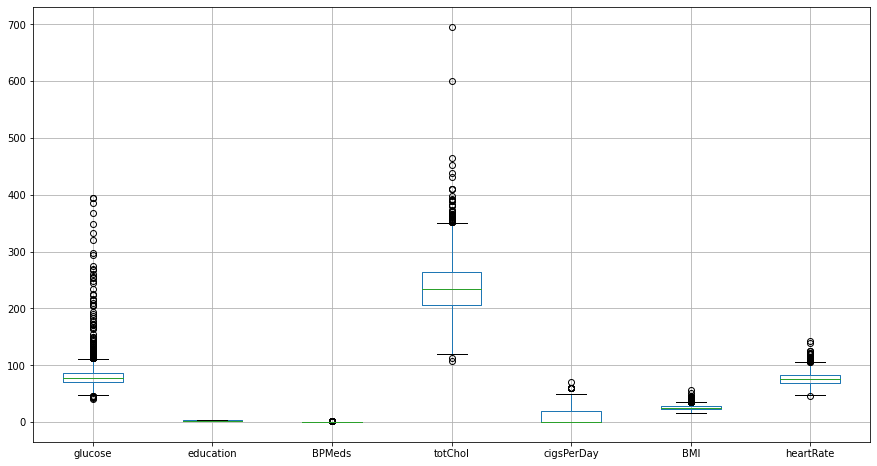

In [20]:
# storing the column that contains null values  
null_column_list= ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']
# plotting box plot
plt.figure(figsize=(15,8))
df[null_column_list].boxplot()

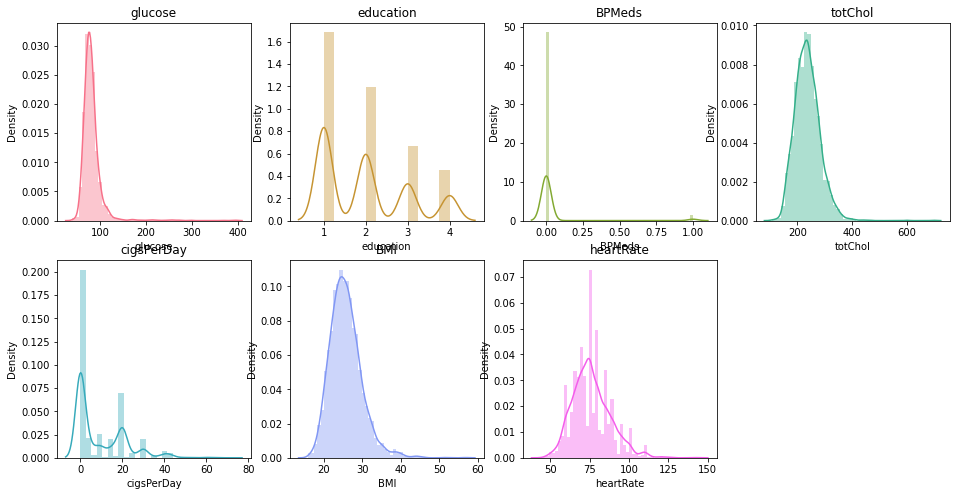

In [21]:
# Define a list of colors
colors = sns.color_palette("husl", len(null_column_list))

# Create a figure with 8 subplots (2 rows, 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over the null column list and plot each column's distribution
for i, column in enumerate(null_column_list):
    # Select the current axis
    ax = axes[i]
    # Plot a distplot of the current column with a different color
    sns.distplot(df[column], ax=ax, color=colors[i])
    # Add a title to the plot
    ax.set_title(column)
    
# Remove any unused subplots
for j in range(len(null_column_list), len(axes)):
    axes[j].remove()

# Display the plots
plt.show()

It is a well-known fact that the appropriate measure of central tendency depends on the nature of the data. Typically, the mean is used for data that follows a normal distribution and does not contain any outliers. On the other hand, when dealing with numerical, continuous data that contains extreme values or outliers, the median is the preferred measure of central tendency. For categorical data, the mode is used.

Based on the outliers and distribution of the data, we have determined that the following measures of central tendency are appropriate for imputing the null values in the following columns:

**"education" , "BPMeds"** -> mode: As "education" and "BPMeds" is a categorical variable, the mode is the most appropriate measure of central tendency. The mode represents the most frequently occurring value in the distribution and can provide insight into the most common level of education in the dataset.

**"glucose","totChol", "cigsPerDay", "BMI", "heartRate"** -> median: Since this are numerical, continuous variable that contain extreme values or outliers, we have chosen the median as the appropriate measure of central tendency. The median is less sensitive to extreme values than the mean and provides a representative value for the central tendency of the distribution.

In [22]:
# Imputing missing values with median or mode
df.fillna({'glucose': df['glucose'].median(),
           'education': df['education'].mode()[0],
           'BPMeds': df['BPMeds'].mode()[0],
           'totChol': df['totChol'].median(),
           'cigsPerDay': df['cigsPerDay'].median(),
           'BMI': df['BMI'].median(),
           'heartRate': df['heartRate'].median()}, inplace=True)

### What all manipulations have you done and insights you found?

performed imputation of missing values using a combination of median and mode imputation. Specifically, for the glucose and totChol columns, cigsPerDay, BMI, and heartRate the missing values are replaced with the median of the non-missing values. For the education, BPMeds columns, the missing values are replaced with the mode (most frequently occurring value) of the non-missing values.

Median and mode imputation are commonly used imputation techniques for handling missing values. Median imputation is often used for continuous variables, as it is less sensitive to outliers compared to mean imputation. Mode imputation is often used for categorical variables or discrete variables with a small number of possible values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1) AGE**
 **Which age group is more susceptible to developing coronary heart disease?**

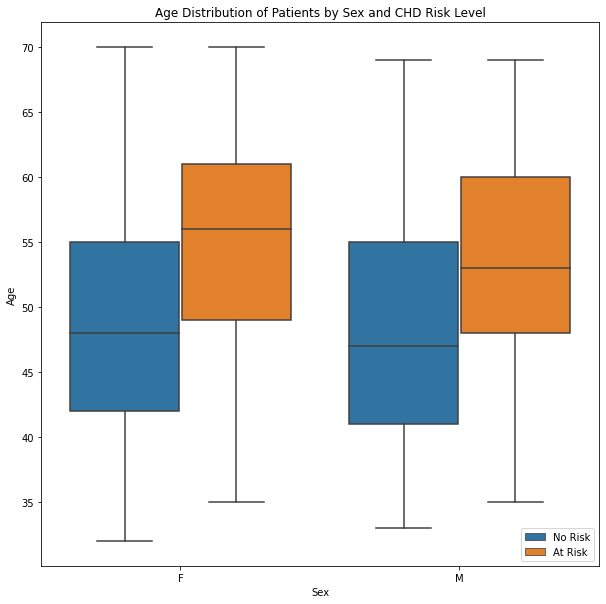

In [23]:
# Chart - 1 visualization code

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))
# Create a boxplot to compare the age distribution of patients by sex and CHD risk level
sns.boxplot(x="sex", y="age", hue="TenYearCHD", data= df, ax=ax)
# Set the title and labels
ax.set_title("Age Distribution of Patients by Sex and CHD Risk Level")
ax.set_xlabel("Sex")
ax.set_ylabel("Age")
# Adding a legend with appropriate labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Risk", "At Risk"], loc="best")
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 2) SEX**
**Does gender affect the risk of coronary heart disease in the dataset?**

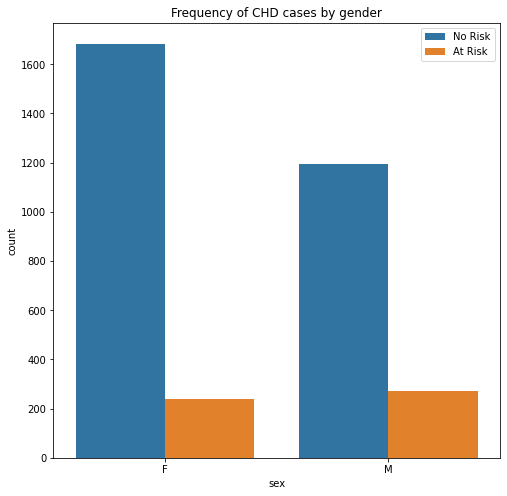

In [24]:
# Chart - 2 visualization code

plt.figure(figsize=(8,8))
sns.countplot(x='sex', hue='TenYearCHD', data= df)
plt.title('Frequency of CHD cases by gender')
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 3) IS_SMOKING**
**Do smokers have a higher risk of developing coronary heart disease?**

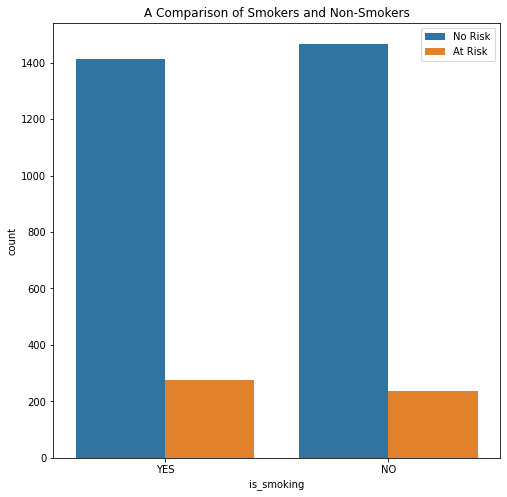

In [25]:
# Chart - 3 visualization code

plt.figure(figsize=(8,8))
sns.countplot(x='is_smoking', hue='TenYearCHD', data= df)
plt.title('A Comparison of Smokers and Non-Smokers')
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 4) CIGS PER DAY**
**How much smoking affect coronary heart disease?**

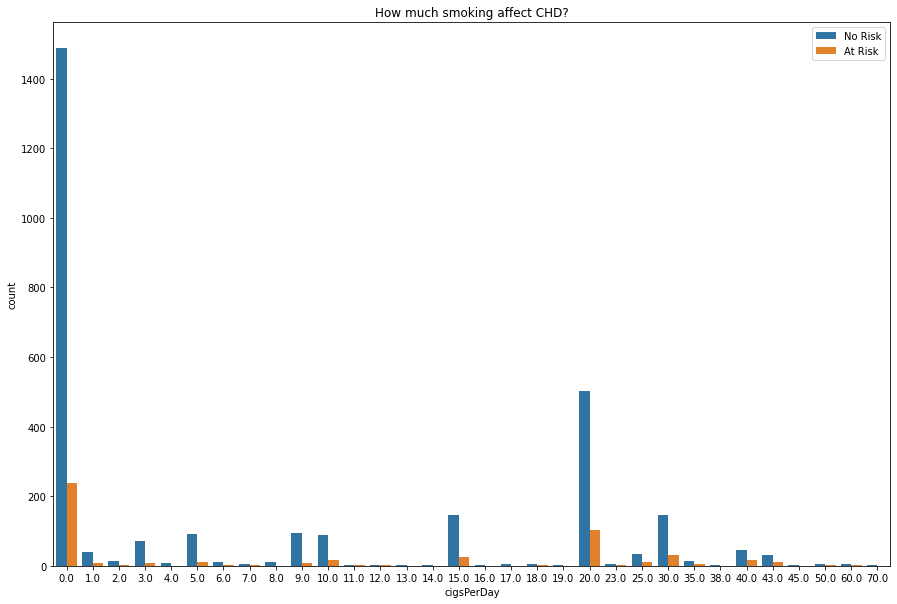

In [26]:
# Chart - 4 visualization code
plt.figure(figsize=(15,10))
sns.countplot(x= df['cigsPerDay'],hue= df['TenYearCHD'])
plt.title('How much smoking affect CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 5) BP MEDS** 
**Do patients taking medication for blood pressure have a higher risk of developing coronary heart disease?**


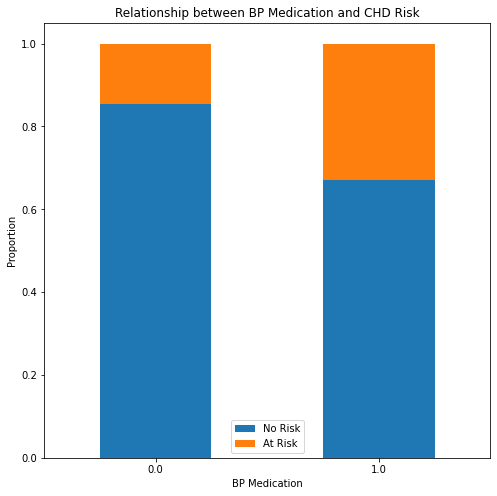

In [27]:
# Chart - 5 visualization code

# Compute the cross-tabulation of BP medication and CHD risk
ct = pd.crosstab(df['BPMeds'], df['TenYearCHD'], normalize='index')
# Plot a stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(8, 8))
plt.title('Relationship between BP Medication and CHD Risk')
plt.xlabel('BP Medication')
plt.xticks(rotation=0)
plt.ylabel('Proportion')
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 6) PREVALENT STROKE** 
**Is a person who has had a stroke more susceptible to coronary heart disease?**

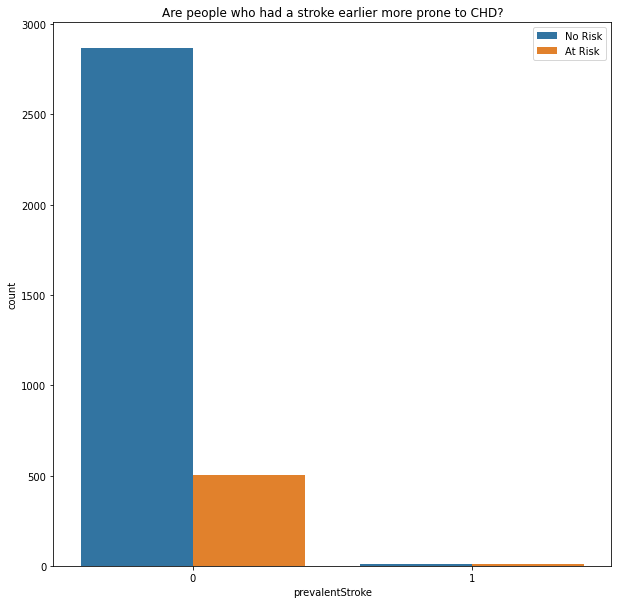

In [28]:
# Chart - 6 visualization code

plt.figure(figsize=(10,10))
sns.countplot(x=df['prevalentStroke'], hue=df['TenYearCHD'])
plt.title('Are people who had a stroke earlier more prone to CHD?')
plt.legend(['No Risk', 'At Risk'], loc='best')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 7) PREVALENT HYP**
**Does having hypertension increase the risk of developing coronary heart disease?**

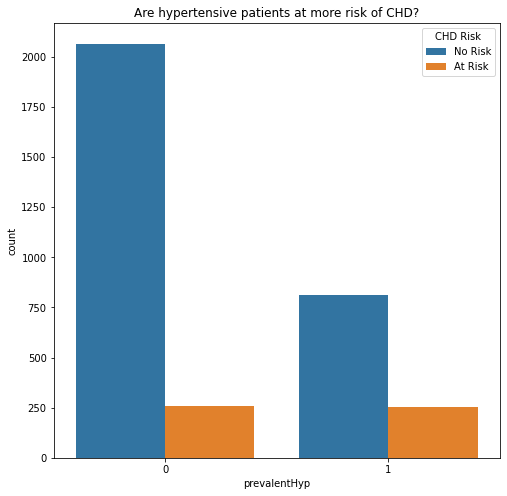

In [29]:
# Chart - 7 visualization code

plt.figure(figsize=(8,8))
sns.countplot(x=df['prevalentHyp'], hue=df['TenYearCHD'])
plt.title('Are hypertensive patients at more risk of CHD?')
plt.legend(title='CHD Risk', labels=['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 8) DIABETES**
**Do individuals with diabetes have a higher risk of developing coronary heart disease?**

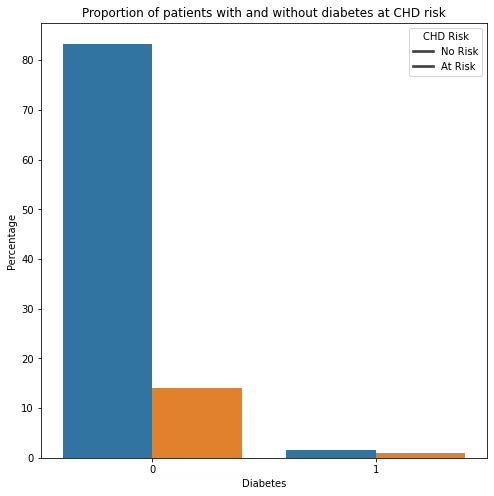

In [30]:
# Chart - 8 visualization code

plt.figure(figsize=(8,8))
sns.barplot(x=df['diabetes'], y=df['TenYearCHD'], hue=df['TenYearCHD'], estimator=lambda x: len(x) / len(df) * 100)
plt.title('Proportion of patients with and without diabetes at CHD risk')
plt.xlabel('Diabetes')
plt.ylabel('Percentage')
plt.legend(title='CHD Risk', labels=['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 9) TOTAL CHOLESTEROL**
**Is there a correlation between total cholesterol levels and coronary heart disease?**

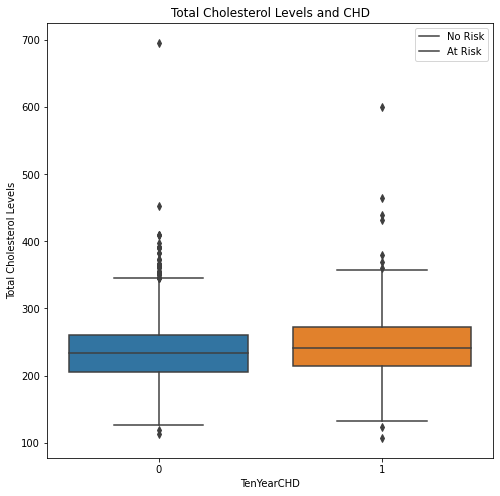

In [31]:
# Chart - 9 visualization code

plt.figure(figsize=(8,8))
sns.boxplot(x='TenYearCHD', y='totChol', data=df)
plt.title('Total Cholesterol Levels and CHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Total Cholesterol Levels')
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [32]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [33]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [34]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [35]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [36]:
df.corr()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.016759,-0.027337,-0.018097,0.007014,-0.038873,0.013236,0.003690,-0.019792,0.019676,0.000832,0.039739,0.024691,0.014187,0.009866
age,0.016759,1.000000,-0.170614,-0.191465,0.122114,0.059038,0.308826,0.107875,0.271961,0.404845,0.221896,0.137478,-0.002636,0.112395,0.224927
education,-0.027337,-0.170614,1.000000,0.014078,-0.019880,-0.031820,-0.081925,-0.051895,-0.021221,-0.132202,-0.060774,-0.135783,-0.039395,-0.039303,-0.051388
cigsPerDay,-0.018097,-0.191465,0.014078,1.000000,-0.035727,-0.041576,-0.078003,-0.048114,-0.025346,-0.100348,-0.068320,-0.099830,0.066229,-0.066374,0.068020
BPMeds,0.007014,0.122114,-0.019880,-0.035727,1.000000,0.116183,0.256892,0.070932,0.080918,0.260384,0.198780,0.087648,0.018107,0.061356,0.087349
prevalentStroke,-0.038873,0.059038,-0.031820,-0.041576,0.116183,1.000000,0.071652,0.010115,-0.010769,0.057568,0.047235,0.017032,-0.019183,0.023662,0.068627
prevalentHyp,0.013236,0.308826,-0.081925,-0.078003,0.256892,0.071652,1.000000,0.082565,0.158693,0.699285,0.612897,0.299615,0.150731,0.082962,0.166544
diabetes,0.003690,0.107875,-0.051895,-0.048114,0.070932,0.010115,0.082565,1.000000,0.059194,0.124011,0.061165,0.087793,0.039746,0.609743,0.103681
totChol,-0.019792,0.271961,-0.021221,-0.025346,0.080918,-0.010769,0.158693,0.059194,1.000000,0.197848,0.153825,0.113452,0.086955,0.060913,0.093605
sysBP,0.019676,0.404845,-0.132202,-0.100348,0.260384,0.057568,0.699285,0.124011,0.197848,1.000000,0.781908,0.331730,0.178135,0.137832,0.212703


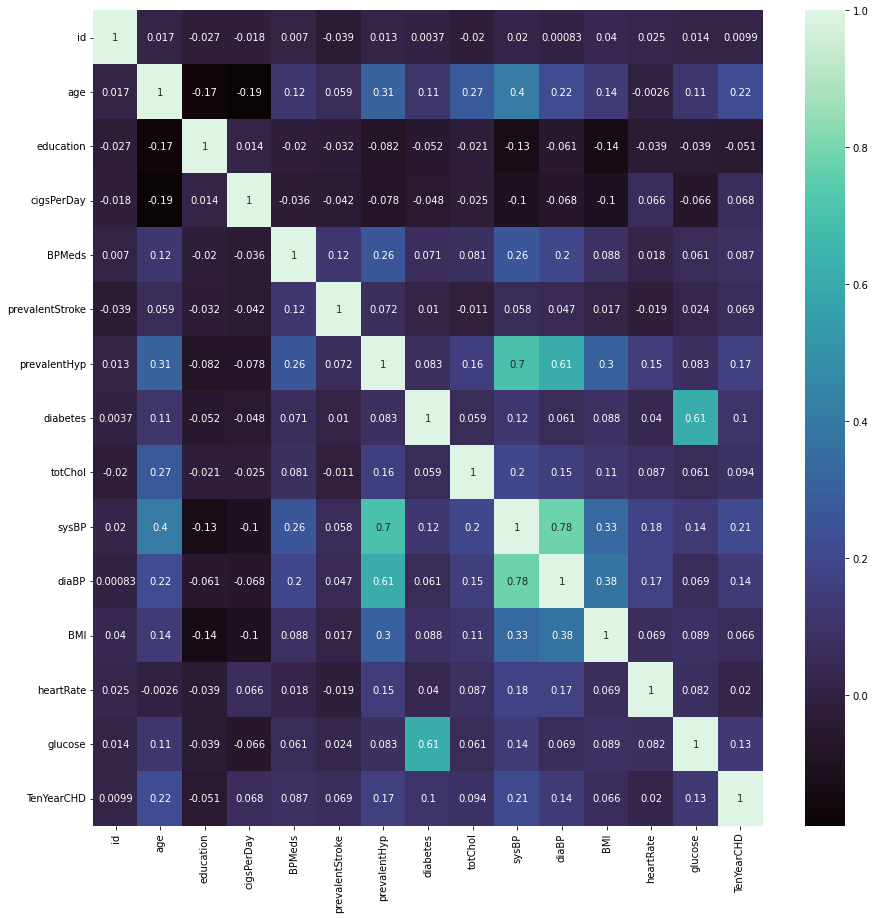

In [37]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,15))
correlation = df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("mako", as_cmap=True))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

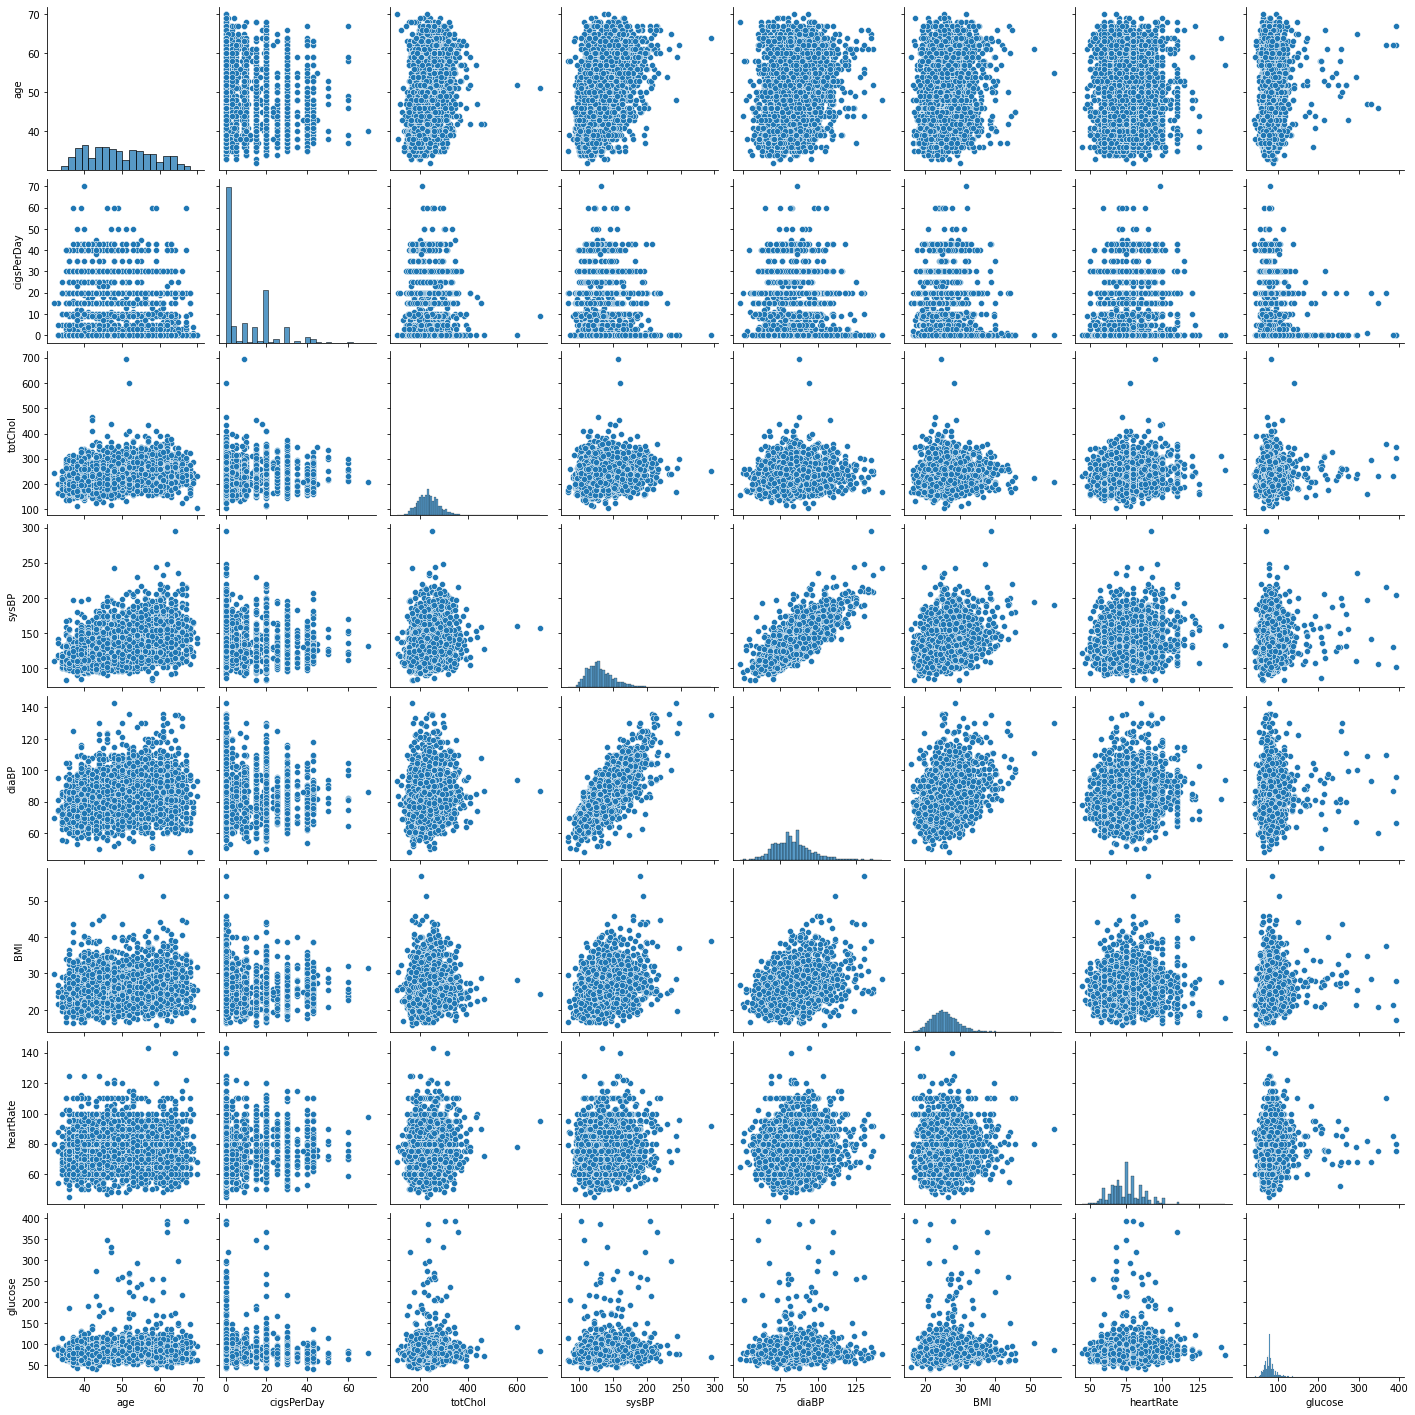

In [38]:
# Pair Plot visualization code
sns.pairplot(df[continous_variable])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1) Higher total cholesterol levels are associated with an increased risk of CHD.

2) Diabetic patients are at a higher risk of developing CHD than non-diabetic patients.

3) Individuals above the age of 50 are more likely to be at risk of TenYearCHD.

### Hypothetical Statement - 1) Higher total cholesterol levels are associated with an increased risk of CHD

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no difference in the mean total cholesterol levels between the two groups

Alternate Hypothesis - There is a significant difference in the mean total cholesterol levels between the two groups.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

# Import the required statistical test module from scipy
import scipy.stats as stats

# Separate the dataset into two groups based on CHD status
chd = df[df['TenYearCHD'] == 1] # Patients with CHD
no_chd = df[df['TenYearCHD'] == 0] # Patients without CHD

# Perform a two-sample t-test to compare the mean total cholesterol levels of the two groups
t_stat, p_val = stats.ttest_ind(chd['totChol'], no_chd['totChol'], equal_var=False)

# Print the calculated t-statistic and p-value
print('t_stat=%.3f, p_val=%.3f' % (t_stat, p_val))

# Determine if the null hypothesis should be rejected based on the p-value
if p_val < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

# Print the p-value
print('p-value:', p_val)

t_stat=5.065, p_val=0.000
Reject the null hypothesis
p-value: 5.310852329016078e-07


We can see that the p-value is very small (p_val=5.310852329016078e-07), which is less than the significance level of 0.05. 

Therefore, the null hypothesis that there is no difference in total cholesterol levels between the two groups (CHD and no CHD) can be rejected. 

This suggests that higher total cholesterol levels are associated with an increased risk of CHD. 

The t-statistic of 5.065 also supports this finding, as it indicates a significant difference between the means of the two groups.

##### Which statistical test have you done to obtain P-Value?

A two-sample t-test was performed to obtain the p-value. The t-test was used to compare the mean total cholesterol levels between two groups, one with CHD and the other without CHD, to determine if there is a significant difference between the two.

##### Why did you choose the specific statistical test?

Based on the hypothesis "Higher total cholesterol levels are associated with an increased risk of CHD.", the appropriate statistical test to perform would be a two-sample t-test. This is because we are comparing the mean total cholesterol levels of two independent groups - those who have CHD and those who do not. Since the outcome variable (CHD status) is dichotomous, we need to compare the means of the two groups to determine if there is a significant difference in total cholesterol levels between the two groups. The two-sample t-test is a common statistical test for comparing the means of two independent groups, and it assumes that the data is normally distributed and that the variances of the two groups are not equal.

### Hypothetical Statement - 2) Diabetic patients are at a higher risk of developing CHD than non-diabetic patients

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant difference in the risk of developing CHD between diabetic and non-diabetic patients.

Alternative hypothesis: Diabetic patients are at a higher risk of developing CHD than non-diabetic patients.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Separate the dataset into two groups based on diabetic status
diabetic = df[df['diabetes'] == 1]
non_diabetic = df[df['diabetes'] == 0]

# Perform a two-sample t-test to compare the mean TenYearCHD rates of the two groups
t_stat, p_val = stats.ttest_ind(diabetic['TenYearCHD'], non_diabetic['TenYearCHD'], equal_var=False)

print('t_stat=%.3f, p_val=%.3f' % (t_stat, p_val))
if p_val > 0.05:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')

# Print the p-value
print('p-value:', p_val)

t_stat=4.453, p_val=0.000
Reject Null Hypothesis
p-value: 2.463686008547406e-05


The t-statistic is a measure of the difference in means between diabetic and non-diabetic patients, normalized by the standard error of the difference. The p-value is a measure of the probability of observing such a difference in means by chance alone, assuming that the null hypothesis is true.

The obtained p-value of 0.000 is less than the significance level of 0.05, which suggests that the probability of observing such a difference in means by chance alone is very low. Therefore, we reject the null hypothesis and conclude that diabetic patients are at a higher risk of developing CHD than non-diabetic patients.

##### Which statistical test have you done to obtain P-Value?

The two-sample t-test was used to obtain the p-value for the hypothesis "Diabetic patients are at a higher risk of developing CHD than non-diabetic patients."





##### Why did you choose the specific statistical test?

The two-sample t-test was chosen because we are comparing the means of two independent groups (diabetic vs non-diabetic) with respect to the binary outcome variable of CHD risk. The t-test is appropriate for this type of analysis as it allows us to test whether there is a statistically significant difference between the means of two groups. Additionally, since the sample sizes of the two groups are relatively large, the t-test is a robust and reliable test to use.

### Hypothetical Statement - 3) Individuals above the age of 50 are more likely to be at risk of TenYearCHD.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis - Age has no effect on the risk of TenYearCHD.

Alternative hypothesis - Patients over 50 years of age have a higher risk of TenYearCHD than those who are under 50 years of age.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value
import statsmodels.stats.proportion as smp

# Separate the dataset into two groups based on age
above_50 = df[df['age'] > 50]
below_50 = df[df['age'] <= 50]

# Calculate the proportion of patients with TenYearCHD in each group
prop_above_50 = above_50['TenYearCHD'].mean()
prop_below_50 = below_50['TenYearCHD'].mean()

# Perform a one-tailed z-test to compare the proportions of the two groups
z_score, p_val = smp.proportions_ztest([prop_above_50 * len(above_50), prop_below_50 * len(below_50)], [len(above_50), len(below_50)], alternative='larger')

print('z_score=%.3f, p_val=%.3f' % (z_score, p_val))

if p_val < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

# Print the p-value
print('p-value:', p_val)

z_score=11.155, p_val=0.000
Reject Null Hypothesis
p-value: 3.388983060064358e-29


The results of the test indicate that the probability of observing a difference in the proportion of TenYearCHD risk between patients above 50 years of age and those below 50 years of age due to chance is very low.

Rejected the null hypothesis and conclude that patients who are above 50 years of age are at a significantly higher risk of TenYearCHD than those who are below 50 years of age.

##### Which statistical test have you done to obtain P-Value?

I used a one-tailed Z-test to compare the proportions of patients with TenYearCHD above and below 50 years of age.

##### Why did you choose the specific statistical test?

I chose a one-tailed z-test to compare the proportions of the two groups because we are interested in whether the proportion of patients with TenYearCHD in the group above 50 years is greater than the proportion in the group below 50 years. The z-test is appropriate when we have a large sample size and want to compare proportions of two groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no remaining null values in our dataset as we have already processed and handled them in data wrangling.

### 2. Handling Outliers

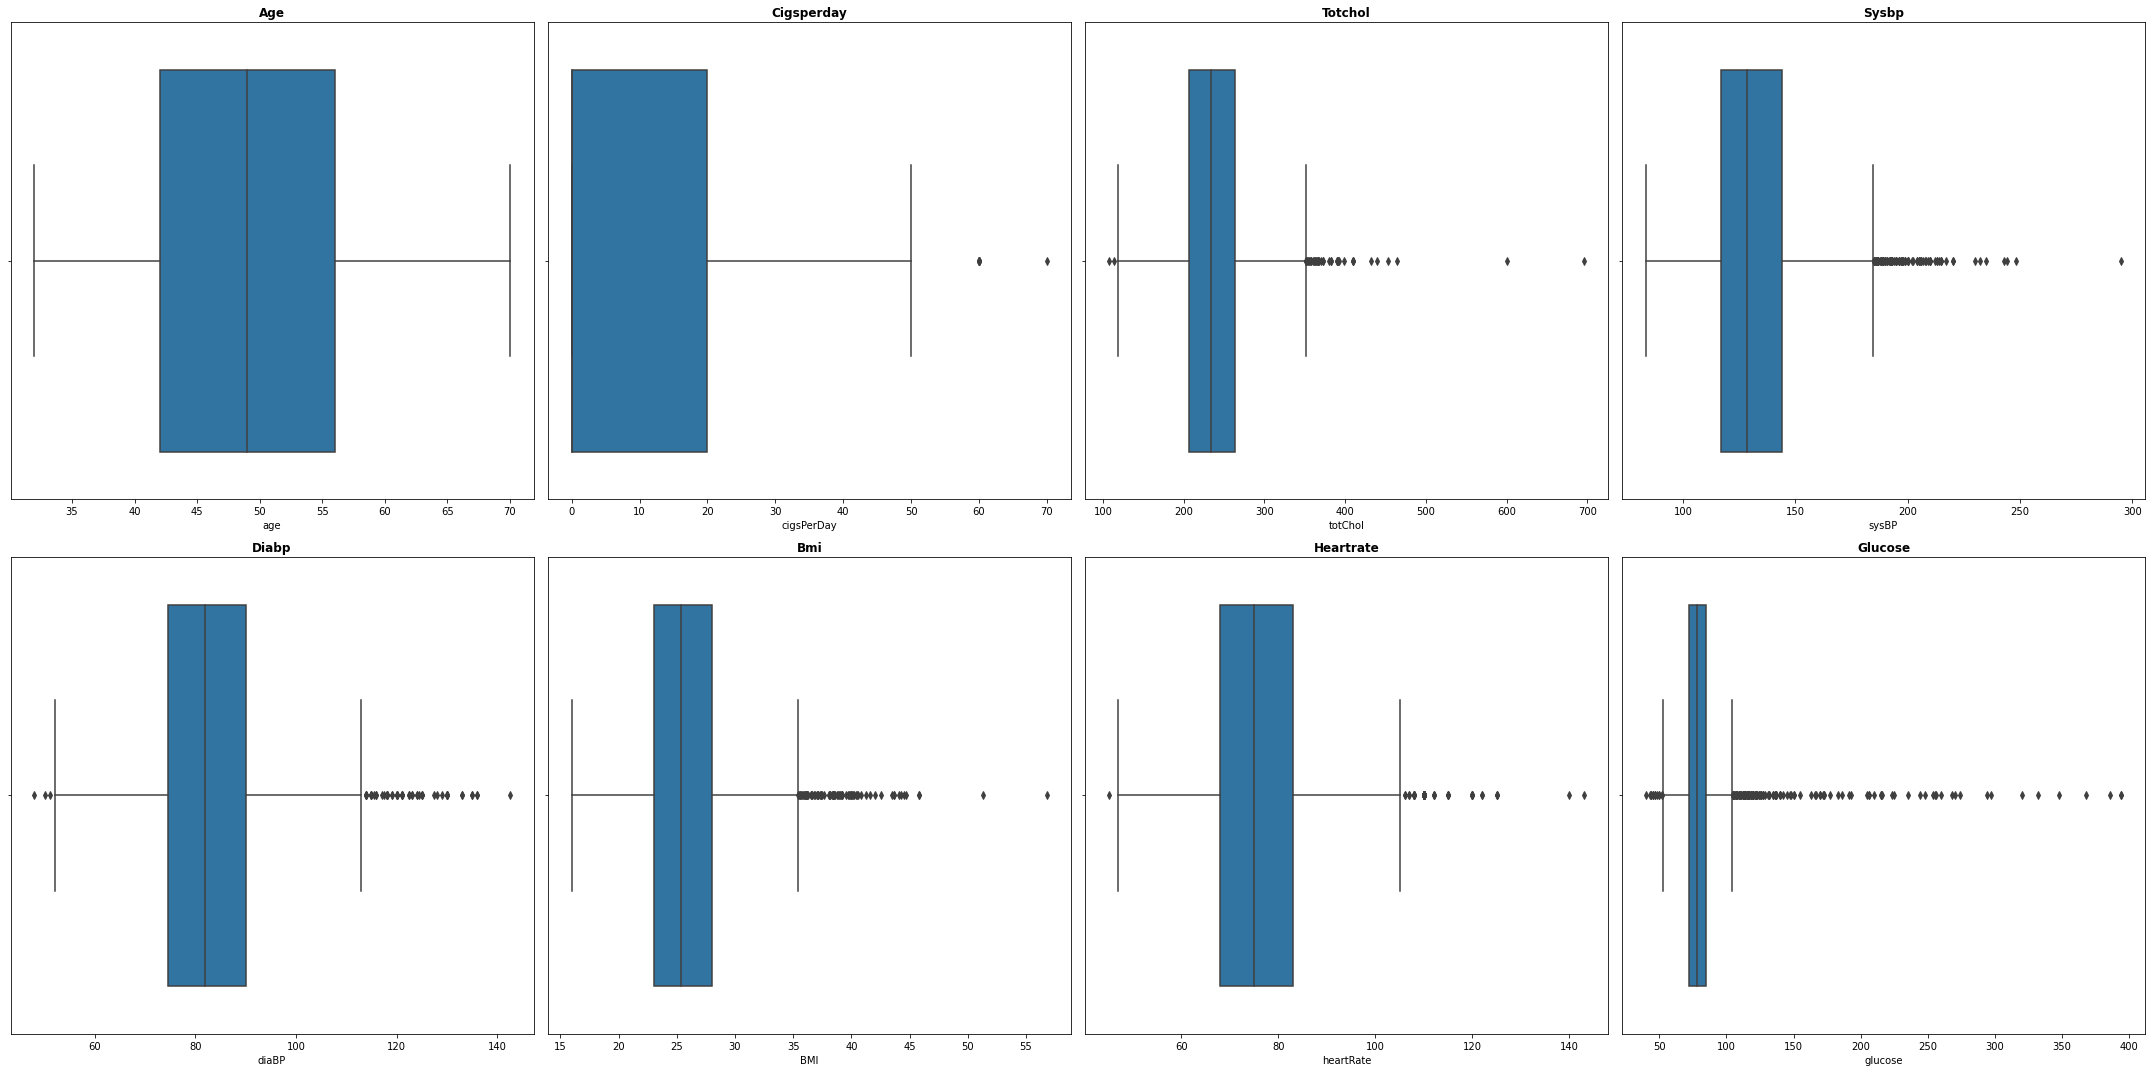

In [43]:
# Handling Outliers & Outlier treatments
fig, axes = plt.subplots(2, 4, figsize=(30, 15))
axes = axes.flatten()
for ax, col in zip(axes, continous_variable):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(col.title(), weight='bold')
plt.tight_layout()

In [44]:
## fuction to create dataframe of total outliers and percentage of outliers
def outliers_df(df, continuous_features):
    outlier_df = pd.DataFrame(columns=['feature', 'lower_limit', 'upper_limit',
                                       'IQR', 'total_outliers', 'percentage_outliers(%)'])
    for feature in continuous_features:
        values = df[feature]
        q1, q2, q3 = values.quantile([0.25, 0.5, 0.75])
        iqr = q3 - q1
        Lower_limit = q1 - 1.5 * iqr
        Upper_limit = q3 + 1.5 * iqr
        outliers = values[(values < Lower_limit) | (values > Upper_limit)]
        total_outliers = len(outliers)
        percentage_outliers = round(total_outliers * 100 / len(values), 2)
        outlier_df = outlier_df.append({'feature': feature,
                                        'lower_limit': Lower_limit,
                                        'upper_limit': Upper_limit,
                                        'IQR': iqr,
                                        'total_outliers': total_outliers, 
                                        'percentage_outliers(%)': percentage_outliers}, 
                                        ignore_index=True)
    return outlier_df.sort_values(by=['percentage_outliers(%)'], ascending=False)

In [45]:
outliers_df(df,continous_variable)

,feature,lower_limit,upper_limit,IQR,total_outliers,percentage_outliers(%)
7,glucose,52.50000,104.50000,13.0000,214,6.31
3,sysBP,76.50000,184.50000,27.0000,105,3.10
5,BMI,15.57875,35.44875,4.9675,79,2.33
6,heartRate,45.50000,105.50000,15.0000,64,1.89
4,diaBP,51.25000,113.25000,15.5000,58,1.71
2,totChol,119.00000,351.00000,58.0000,43,1.27
1,cigsPerDay,-30.00000,50.00000,20.0000,9,0.27
0,age,21.00000,77.00000,14.0000,0,0.00


As moving all the outliers into the 25-75 interquartile range may not be appropriate for this dataset since they may correspond to critical patients

There are several methods that can be used to treat outliers in a dataset, some of which are Removing outliers, Winsorization, Robust statistical methods, Transformation.

As Removing outliers involves deleting the data points that are identified as outliers. However, this approach can result in a loss of information and reduction in the sample size.

So we will go for transformation that is transforming the data using mathematical functions such as logarithmic, square root, or reciprocal can help to normalize the distribution and reduce the effect of outliers  in Data Transformation section.



##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [46]:
# Encode your categorical columns
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)
df['is_smoking'] = pd.get_dummies(df['is_smoking'], drop_first=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   uint8  
 4   is_smoking       3390 non-null   uint8  
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### What all categorical encoding techniques have you used & why did you use those techniques?

The reason for using this technique is that categorical variables are usually non-numeric, but machine learning algorithms require input to be in a numerical format. So we are using one-hot encoding to transform the categorical variables 'sex' and 'is_smoking' into numerical variables in the form of binary values
(0 or 1). 

Specifically, it is using the get_dummies() function from the pandas library to create dummy variables, which will represent the categories of each variable as a separate binary column.

Additionally, the use of drop_first=True parameter is to avoid multicollinearity in the dataset which may occur when two dummy variables are highly correlated.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [48]:
# Expand Contraction

#### 2. Lower Casing

In [49]:
# Lower Casing

#### 3. Removing Punctuations

In [50]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords

In [53]:
# Remove White spaces

#### 6. Rephrase Text

In [54]:
# Rephrase Text

#### 7. Tokenization

In [55]:
# Tokenization

#### 8. Text Normalization

In [56]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [57]:
# POS Taging

#### 10. Text Vectorization

In [58]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# Manipulate Features to minimize feature correlation and create new features

In correlation Heatmap we already seen that Systolic Blood Pressure and Diastolic Pressure are highly correlated. 

So we are Creating a new feature out of it to indicate whether an individual has a blood pressure issue or not.

In [60]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Upon further investigation of heart issues, it was found that pulse pressure, which is the difference between systolic and diastolic blood pressure, has a notable impact on CHD. Hence, we can create a new feature called PP (pulse pressure) which will combine the systolic and diastolic blood pressure readings into a single column.

In [61]:
# Adding pulse pressure as a column
df['pulsePressure'] = df['sysBP'] - df['diaBP']

In [62]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,pulsePressure
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,63.0
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,70.0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,45.0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,70.0
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,51.5


#### 2. Feature Selection

In [63]:
# Select your features wisely to avoid overfitting

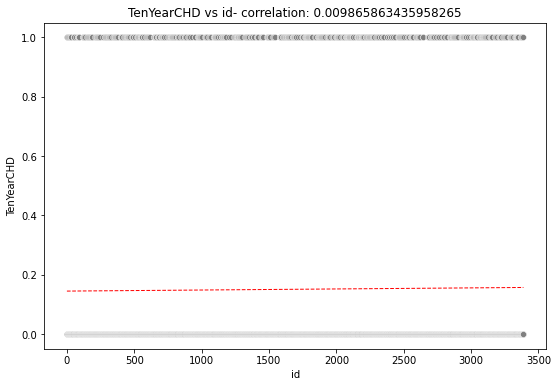

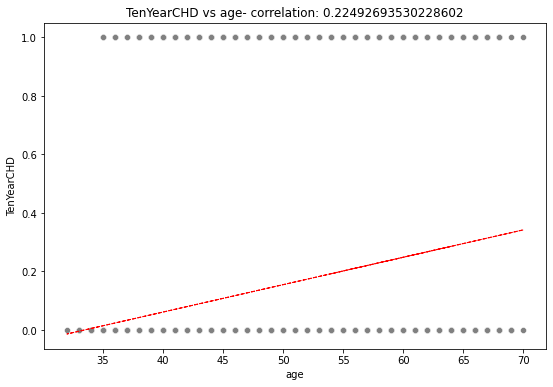

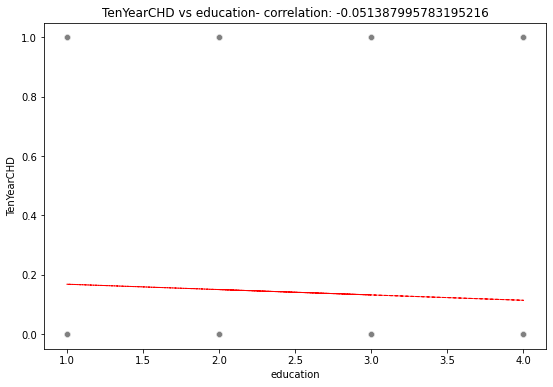

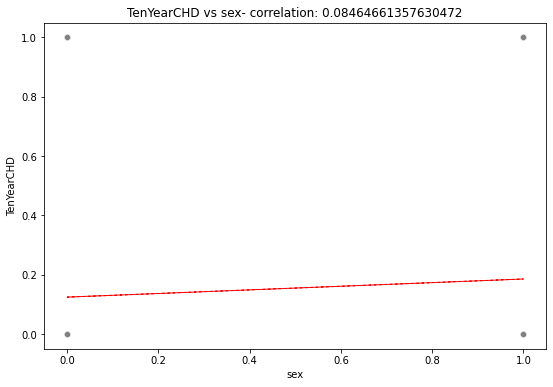

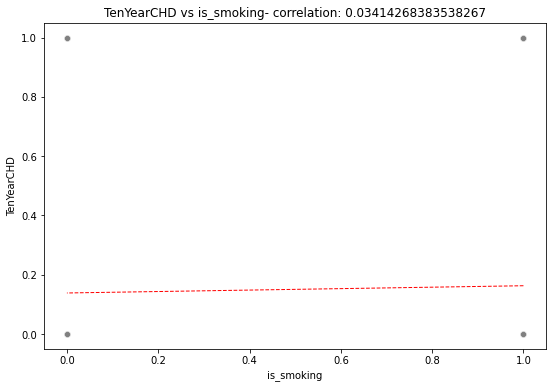

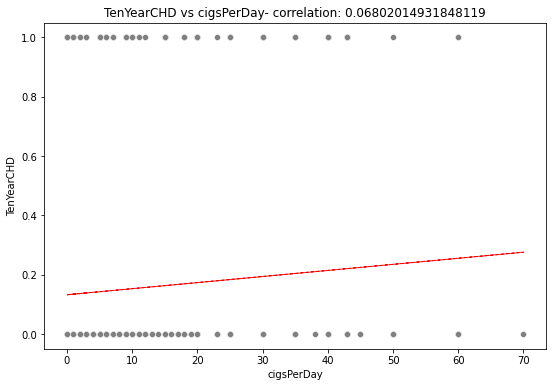

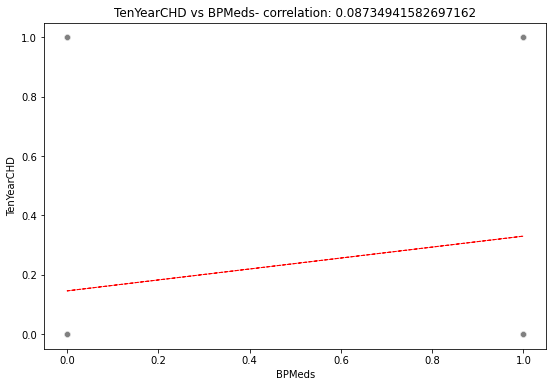

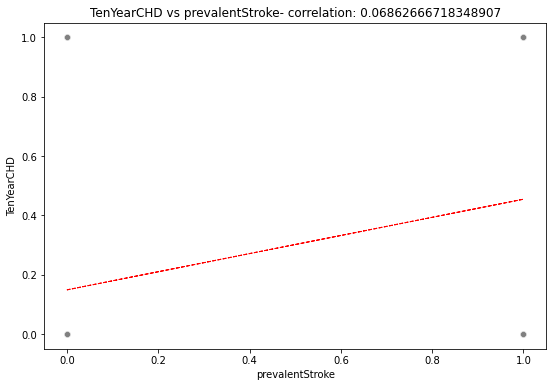

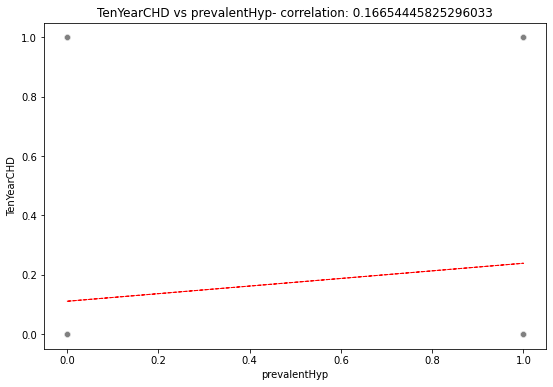

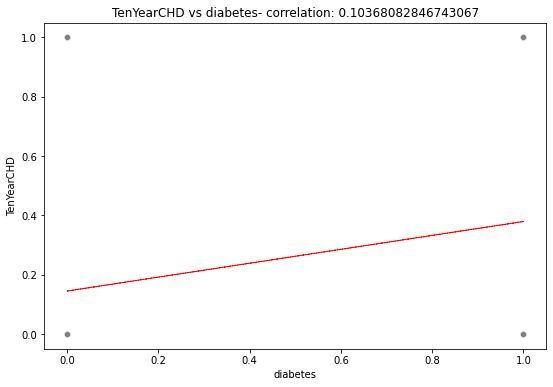

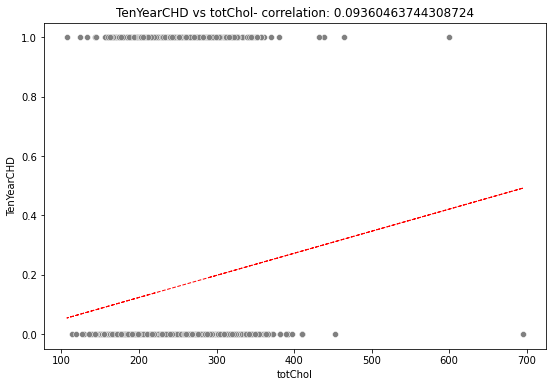

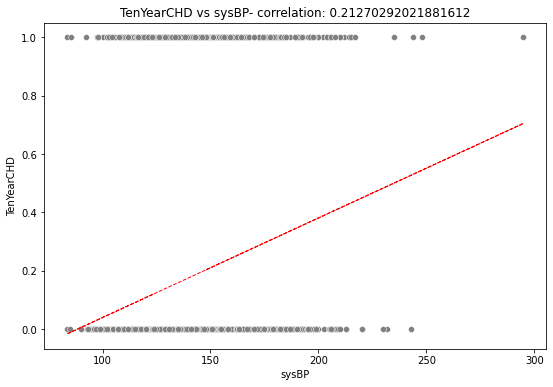

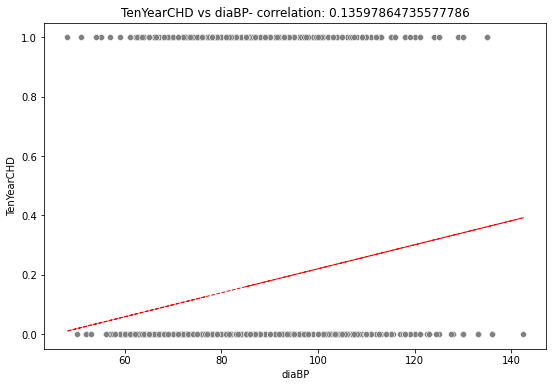

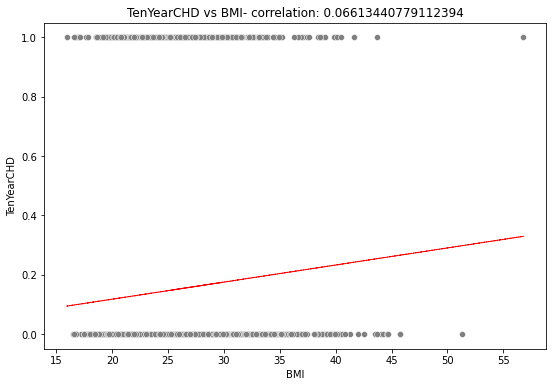

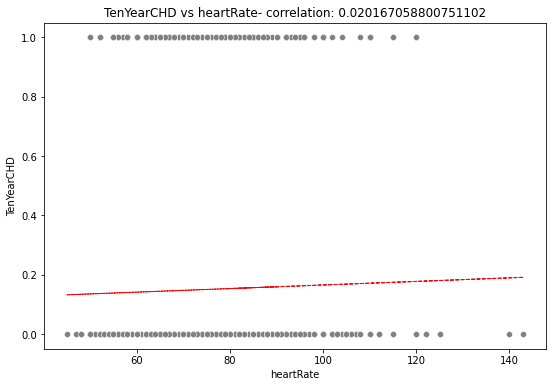

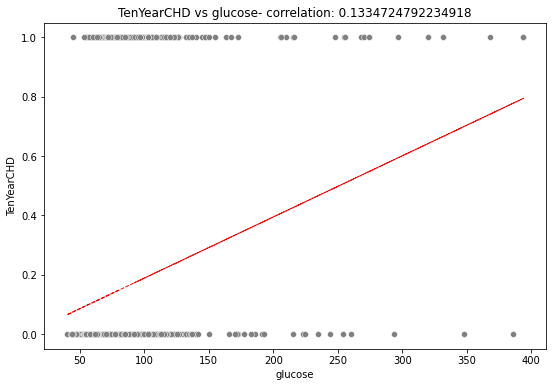

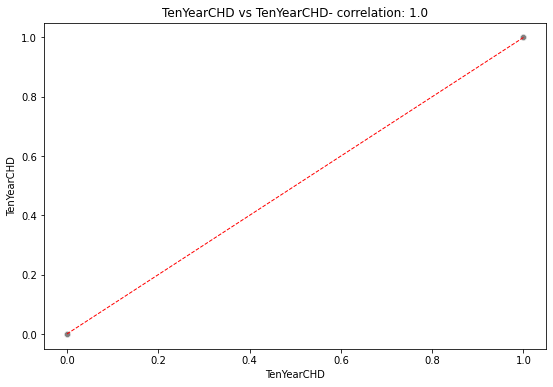

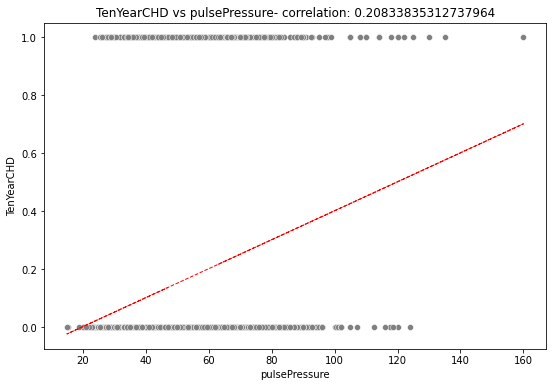

In [64]:
# Let's see how trip_duration and other features are related
for col in df.describe().columns.tolist():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['TenYearCHD']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('TenYearCHD')
    ax.set_title('TenYearCHD vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['TenYearCHD'], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)
    plt.show()

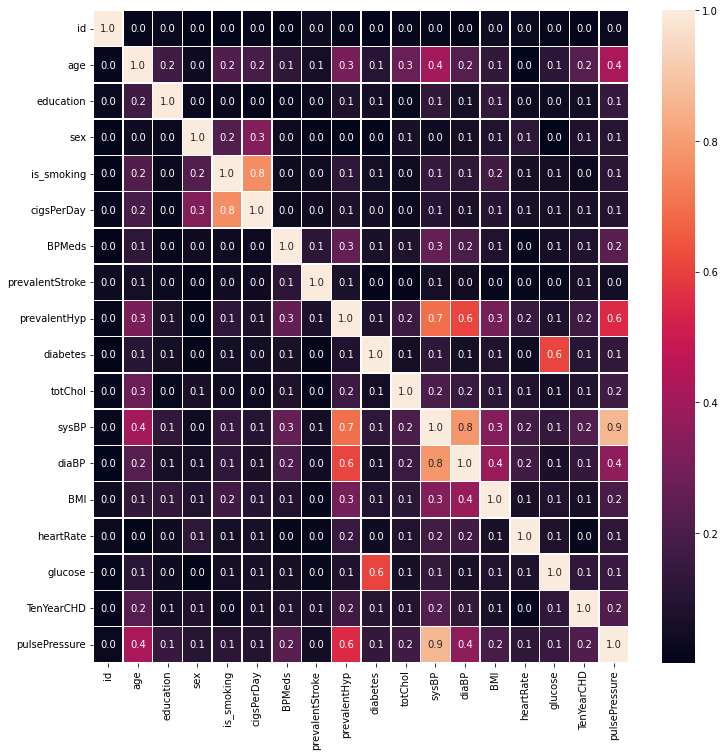

In [65]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(abs(round(df.corr(),3)), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

##### What all feature selection methods have you used  and why?

Correlation analysis: This method involves measuring the correlation between each feature and the target variable. Features having a high correlation with target variable are generally considered to be good predictors and are therefore selected.

##### Which all features you found important and why?

1) From heatmap we can clearly see that sysBP and diaBP are highly correlated and already we have calculated new feature from them i.e. pulsePressure. So we are dropping both 'sysBP' and 'diaBP'.

2) Dropping 'id' feature because it is not that important for the analysis.

3) 'is_smoking'and 'cigsPerDay' columns are highly correlated so we can drop  one of them which is ccontributing less in the target variable.

Also, when the number of cigarettes smoked per day is greater than zero, then smoking column is assigned a value of 1, indicating a positive smoking status. Thus, both statements convey identical meaning. So, we are dropping 'is_smoking'.

##### Creating Final DataFrame

In [66]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pulsePressure'],
      dtype='object')

In [74]:
final_df = df[['age', 'education', 'sex','cigsPerDay', 'BPMeds',
               'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
               'BMI', 'heartRate', 'glucose', 'pulsePressure', 'TenYearCHD']]

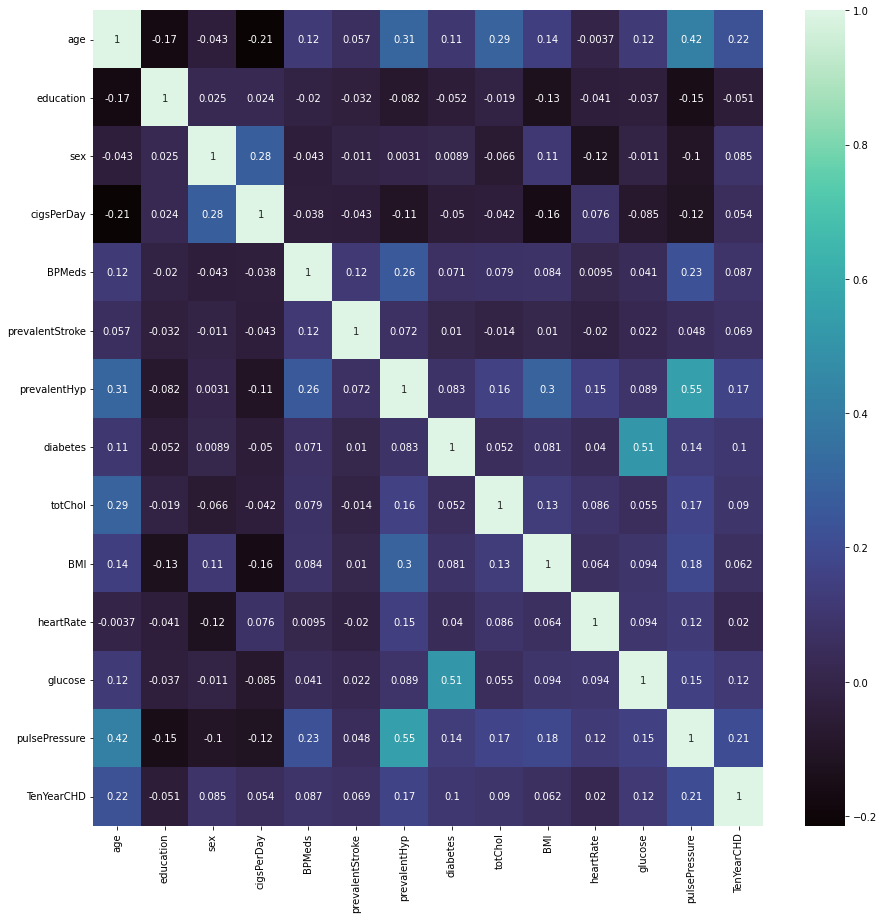

In [80]:
# check for heatmap if anything remains to avoid multicollinearity 
plt.figure(figsize=(15,15))
correlation = final_df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("mako", as_cmap=True))

We can see that 'pulsePressure' , 'glucose' and 'prevalentHyp' are moderately correlated to each other so we can keep them.

### 5. Data Transformation

In [68]:
# applying transformation for treating outlier 
df[continous_variable] = np.log(df[continous_variable] +1 ) 

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [69]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Before scaling our data let's just seperate our "x" and "y" variables

In [86]:
x= final_df.drop('TenYearCHD',axis=1)
y= final_df[['TenYearCHD']]
print(x.shape)
print(y.shape)

(3390, 13)
(3390, 1)


In [87]:
# Scaling your data

# Creating object
std_regressor= StandardScaler()
     
# Fit and Transform
x= std_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

NO it's not needed.

However, in this case of the cardiovascular risk prediction dataset, it is not necessary to perform dimensionality reduction. This is because the dataset has a relatively small number of features compared to the number of samples, which means that the risk of overfitting is low. Additionally, the dataset is relatively small, so the training time for machine learning models would not be a significant issue.

In [71]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [72]:
# Split your data to train and test. Choose Splitting ratio wisely.

Now let's split data in the ratio of 80:20 where 80 % will be in training set and 20 % will be in testing set by using train_test_split function available in sklearn library


In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [89]:
print(f'The shape of x_train is: {x_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {x_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (2712, 13)
The shape of y_train is: (2712, 1)
The shape of x_test is: (678, 13)
The shape of y_test is: (678, 1)


##### What data splitting ratio have you used and why? 

To prevent overfitting and improve model generalization performance, we allocated 80% of the data to the training set and 20% to the testing set. The train_test_split function from the scikit-learn library was used for this purpose, as it's a common approach for training and testing the model on different data samples.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [73]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***